In [1]:
from dotenv import load_dotenv
load_dotenv("../.env")

True

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]
    context: str

graph_builder = StateGraph(State)

In [ ]:
def lookup_context()

In [20]:
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'LangGraph Glossary - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n[](https://langchain-ai.github.io/langgraph/concepts/low_level/#__codelineno-7-1)fromlangchain_core.runnablesimport RunnableConfig [...] LangGraph Glossary¶\nGraphs¶\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\n\n\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\n\n\nNodes: Python functions that encode the logic of your agents. They 

In [21]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [22]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo-16k")
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [23]:
from langgraph.prebuilt import ToolNode, tools_condition

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [24]:

graph_builder.add_conditional_edges(
    "chatbot", tools_condition
)

In [25]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("tools", "chatbot")
graph = graph_builder.compile(checkpointer=memory)

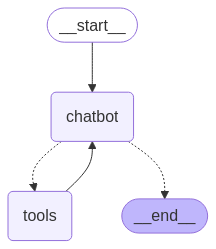

In [26]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
def stream_graph_update(user_input: str):
    for event in graph.stream(
        {"messages": [{"role": "user", "content": user_input}]}, 
        {"configurable": {"thread_id": "1"}},
        stream_mode="values",
    ):
        event["messages"][-1].pretty_print()

In [33]:
while True:
    try:
        user_input = input("User: ")
        print("You: ", user_input)
        if user_input.lower() in ["exit", "q", "quit"]:
            break
        stream_graph_update(user_input)
    except:
        break

You:  hey
================================ Human Message =================================

hey
================================== Ai Message ==================================

Hello! How can I assist you today?
You:  my name is nate
================================ Human Message =================================

my name is nate
================================== Ai Message ==================================

Hello Nate! How can I assist you today?
You:  what is my name
================================ Human Message =================================

what is my name
================================== Ai Message ==================================

Your name is Nate.
You:  q


In [ ]:
graph.get_state({"configurable": {"thread_id": "1"}})

StateSnapshot(values={'messages': [HumanMessage(content='hey', additional_kwargs={}, response_metadata={}, id='dcd83dc4-a2f1-4364-9545-77a812d5b522'), HumanMessage(content='hey', additional_kwargs={}, response_metadata={}, id='b7ca4dc9-ec4c-4a0e-92df-02b8d69ca9d4'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 87, 'total_tokens': 98, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-16k-0613', 'system_fingerprint': None, 'id': 'chatcmpl-BLGX1IfgYHCsTPsbL9IZilzDwtQyh', 'finish_reason': 'stop', 'logprobs': None}, id='run-9cf023e2-f0c2-4239-a455-318888be1da1-0', usage_metadata={'input_tokens': 87, 'output_tokens': 11, 'total_tokens': 98, 'input_token_details': {'audio': 0, 'cache_read

: 